# Titanic Survival Rates Prediction Game

In [22]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

In [59]:
# Import supplementary visualizations code visuals.py
import visuals as vs

In [60]:
# Pretty display for notebooks
%matplotlib inline

# Load the dataset
full_data = pd.read_csv('titanic_data.csv')

In [61]:
# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Beginning of Code ----------------------------------------------------------------------------------------------------

In [111]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"

In [113]:
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
#print predictions.head()
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


## Prediction #1 = no survivors

In [118]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

In [66]:
accuracy_score(outcomes, predictions)

'Predictions have an accuracy of 61.62%.'

The above prediction assumes that there are no survivors, and the Accuracy_Score function reveals that this prediction is 61% accurate.

--------------------------------------------------------------------------------------------------------------------------------

## Prediction #2 = ALL females survived

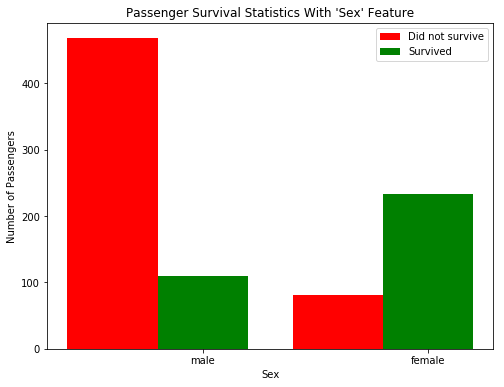

In [117]:
vs.survival_stats(data, outcomes, 'Sex')

In [74]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

In [75]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


The above prediction states that ALL females survived the Titanic sinking, and the Accuracy_Score function shows that the predictions made were 78% accurate.

--------------------------------------------------------------------------------------------------------------------------

## Prediction #3 = females and males BELOW the age of 10 survive

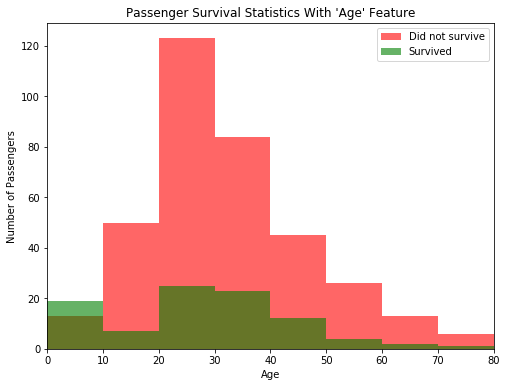

In [76]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

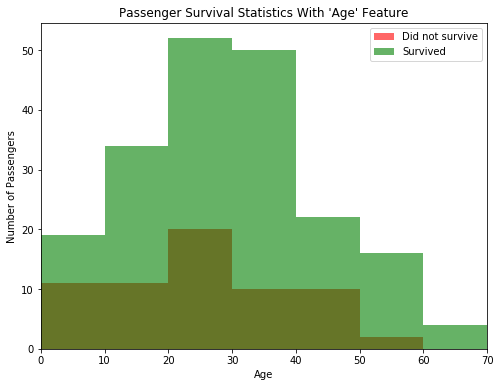

In [78]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'female'"])

In [79]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        elif passenger['Sex'] == 'male' and passenger['Age'] < 10:
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

In [80]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


The prediction above assumes that ALL females and males under the age of 10 years old survived the event. This gives an accuracy rating of 79%

--------------------------------------------------------------------------------------------------------------------------

## Prediction #4 = Accuracy over 80%

### Female greater than 50 years old, Males under 10 years old, Females in class 1 & 2, Females w/no Parch

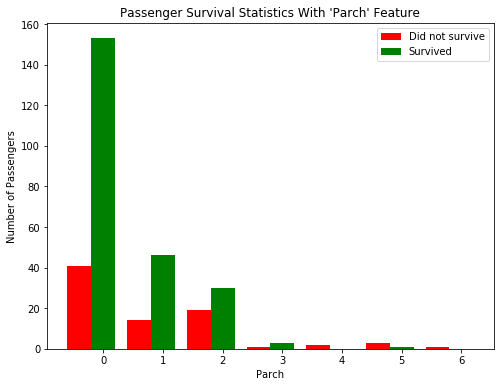

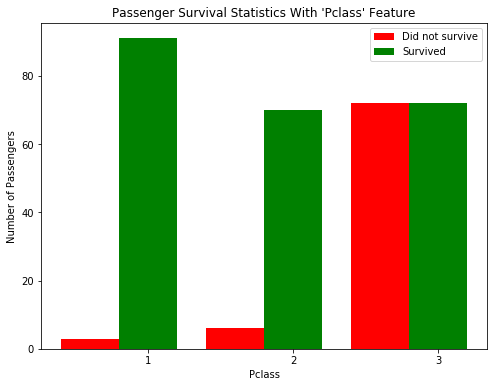

In [116]:
vs.survival_stats(data, outcomes, 'Parch', ["Sex == 'female'"])
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'female'"])

In [109]:
def predictions_3(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female' and passenger['Age'] > 50:
            predictions.append(1)
        elif passenger['Sex'] == 'male' and passenger['Age'] < 10:
            predictions.append(1)
        elif passenger['Sex'] == 'female' and passenger['Pclass'] <= 2:
            predictions.append(1)
        elif passenger['Sex'] == 'female' and passenger['Parch'] == 0:
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

In [105]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 81.03%.


For the above problem, to find a prediction with an accuracy over 80%, I looked at a number of graphs and picked the ones with the greatest discrepancy between survivors and deceased to allow for the greatest prediction accuracy. I recognized that females above the age of 50 years and in Class 1 or 2 had a much higher rate of survival than any other. I also saw that females with 0 parents or children onboard had an extremely high rate of survival. Finally, I used the males under the age of 10 years old to finalize the report. I then tested the Accuracy Score to see the percentage and it came out to 81%.

## Question 5

A real world supervised learning example could be football players statistics during a season. The individual catagorized outcome variables would be numerical outputs such as 'Touchdowns','Passing yards', 'INTs', etc. As far as what data might be helpful, player age, position, previous year statistics, etc all would play in integral role in predicting future outcomes and actions. 